# 01. Exploración de los datos

Se quiere crear un modelo de clasificación que sea capaz de predecir el desempeño que va a tener un estudiante en las Pruebas Saber Pro, examenes dirigidos a las instituciones de educación superior en Colombia para evaluar las competencias y el nivel de conocimientos de los estudiantes. Los niveles de desempeño posibles son: bajo, medio-bajo, medio-alto o alto.

Para esto, se tiene un conjunto de datos con múltiples columnas que describen diferentes aspectos de cada estudiante

### Vistazo inicial del conjunto de datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
train_df.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


### Tamaño del conjunto de datos

In [ ]:
print(f"Cantidad de registros: {train_df.shape[0]}")
print(f"Cantidad de columnas: {train_df.shape[1]}")

Cantidad de registros: 692500
Cantidad de columnas: 21


### Columnas y sus tipos de datos

In [ ]:
for column in train_df.columns:
  print("%30s"%column, train_df[column].dtype)

                            ID int64
             PERIODO_ACADEMICO int64
              E_PRGM_ACADEMICO object
           E_PRGM_DEPARTAMENTO object
   E_VALORMATRICULAUNIVERSIDAD object
          E_HORASSEMANATRABAJA object
             F_ESTRATOVIVIENDA object
               F_TIENEINTERNET object
              F_EDUCACIONPADRE object
               F_TIENELAVADORA object
              F_TIENEAUTOMOVIL object
            E_PRIVADO_LIBERTAD object
         E_PAGOMATRICULAPROPIO object
             F_TIENECOMPUTADOR object
             F_TIENEINTERNET.1 object
              F_EDUCACIONMADRE object
            RENDIMIENTO_GLOBAL object
                   INDICADOR_1 float64
                   INDICADOR_2 float64
                   INDICADOR_3 float64
                   INDICADOR_4 float64


### Inspección de las columnas númericas

In [ ]:
train_df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.750,494564.500,741782.500,989286.000
PERIODO_ACADEMICO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
INDICADOR_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
INDICADOR_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
INDICADOR_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
INDICADOR_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


### Inspección de las columnas categóricas

In [ ]:
categorical_columns = [col for col in train_df.columns if not col in train_df._get_numeric_data()]
for column in categorical_columns:
  print("%20s"%column, np.unique(train_df[column].dropna()))

    E_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GEST

### Valores faltantes en las columnas

In [ ]:
missing_values = train_df.isna().sum()
missing_values[missing_values!=0]

,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623
E_PAGOMATRICULAPROPIO,6498
F_TIENECOMPUTADOR,38103
F_TIENEINTERNET.1,26629


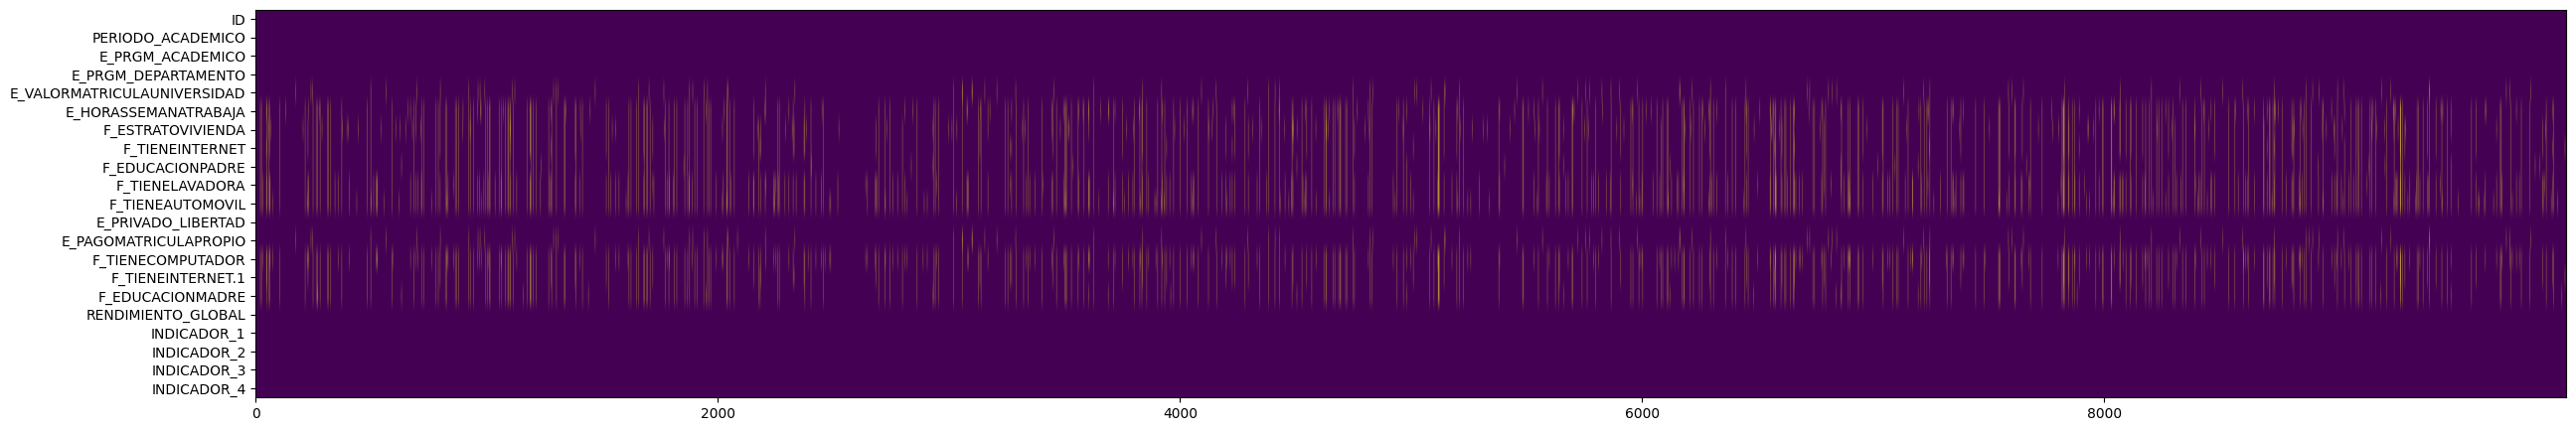

In [ ]:
sample_size = 10000                                     # Tomamos una muestra, los primeros 10000, ya que no se muestra correctamente al usar todos los datos
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(train_df.iloc[:10000].isna().values.T)
ax.set_aspect(80)
plt.yticks(range(train_df.shape[1]), train_df.columns);

### Columna objetivo (RENDIMIENTO_GLOBAL)

<Axes: xlabel='RENDIMIENTO_GLOBAL', ylabel='count'>

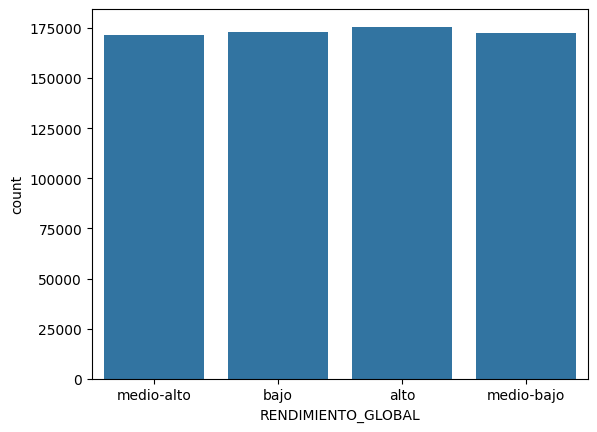

In [ ]:
sns.countplot(x='RENDIMIENTO_GLOBAL', data=train_df)